# Assignment 2

In [1]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications  import VGG19, ResNet50, InceptionV3



## Visualize brain tumor images that demonstrate when images have tumors and when they do not have tumors.

In [2]:
# After saving the following zip file to your working directory extract all files and folders from zip file to local folder.

!unzip brain_tumor_dataset.zip  


Archive:  brain_tumor_dataset.zip
   creating: brain_tumor_dataset/no/
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brai

  inflating: brain_tumor_dataset/yes/Y26.jpg  
  inflating: brain_tumor_dataset/yes/Y27.jpg  
  inflating: brain_tumor_dataset/yes/Y28.jpg  
  inflating: brain_tumor_dataset/yes/Y29.jpg  
  inflating: brain_tumor_dataset/yes/Y3.jpg  
 extracting: brain_tumor_dataset/yes/Y30.jpg  
  inflating: brain_tumor_dataset/yes/Y31.jpg  
  inflating: brain_tumor_dataset/yes/Y32.jpg  
  inflating: brain_tumor_dataset/yes/Y33.jpg  
  inflating: brain_tumor_dataset/yes/Y34.jpg  
  inflating: brain_tumor_dataset/yes/Y35.jpg  
  inflating: brain_tumor_dataset/yes/Y36.JPG  
  inflating: brain_tumor_dataset/yes/Y37.jpg  
 extracting: brain_tumor_dataset/yes/Y38.jpg  
  inflating: brain_tumor_dataset/yes/Y39.jpg  
  inflating: brain_tumor_dataset/yes/Y4.jpg  
  inflating: brain_tumor_dataset/yes/Y40.JPG  
  inflating: brain_tumor_dataset/yes/Y41.jpg  
  inflating: brain_tumor_dataset/yes/Y42.jpg  
  inflating: brain_tumor_dataset/yes/Y44.JPG  
  inflating: brain_tumor_dataset/yes/Y45.JPG  
  inflating: br

In [60]:
# Extracting all filenames iteratively from brain_tumor_dataset folder
base_path = 'brain_tumor_dataset'
categories = ['yes', 'no']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:4]) #examples of file names

number of images for each category: [155, 98]
[['brain_tumor_dataset/yes/Y157.JPG', 'brain_tumor_dataset/yes/Y6.jpg', 'brain_tumor_dataset/yes/Y194.jpg', 'brain_tumor_dataset/yes/Y180.jpg', 'brain_tumor_dataset/yes/Y90.jpg', 'brain_tumor_dataset/yes/Y47.JPG', 'brain_tumor_dataset/yes/Y53.jpg', 'brain_tumor_dataset/yes/Y52.jpg', 'brain_tumor_dataset/yes/Y46.jpg', 'brain_tumor_dataset/yes/Y91.jpg', 'brain_tumor_dataset/yes/Y85.JPG', 'brain_tumor_dataset/yes/Y181.jpg', 'brain_tumor_dataset/yes/Y195.JPG', 'brain_tumor_dataset/yes/Y7.jpg', 'brain_tumor_dataset/yes/Y156.JPG', 'brain_tumor_dataset/yes/Y168.jpg', 'brain_tumor_dataset/yes/Y154.jpg', 'brain_tumor_dataset/yes/Y183.jpg', 'brain_tumor_dataset/yes/Y78.jpg', 'brain_tumor_dataset/yes/Y50.JPG', 'brain_tumor_dataset/yes/Y44.JPG', 'brain_tumor_dataset/yes/Y45.JPG', 'brain_tumor_dataset/yes/Y51.jpg', 'brain_tumor_dataset/yes/Y79.jpg', 'brain_tumor_dataset/yes/Y86.JPG', 'brain_tumor_dataset/yes/Y92.jpg', 'brain_tumor_dataset/yes/Y92.png', 

In [61]:
# Let's explore the details of the image data using load_img from keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import numpy as np
from PIL import Image

img = load_img('brain_tumor_dataset/yes/Y26.jpg')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

# It's an RGB image, so we can import using the following approach.

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(628, 630)


In [62]:
# Import image, load to array of shape height, width, channels, then min/max transform.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((224,224)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) # min max transformation
        img=img.reshape((224,224,3)) # Create final shape as array with correct dimensions for Keras
        return img

# read in all images from filenames

preprocessed_image_data=list(map(load_image, fnames[0]+fnames[1])) 

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model


In [63]:
print(len(preprocessed_image_data) ) #same number of elements as filenames
print(preprocessed_image_data[0].shape ) #dimensions now 192,192,3 for all images
print(preprocessed_image_data[0].min() ) #min value of every image is zero
print(preprocessed_image_data[0].max() ) #max value of every image is one
X.shape # 

253
(224, 224, 3)
0.0
1.0


(253, 224, 224, 3)

In [64]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

yes=list(repeat("yes", 155))
no=list(repeat("no", 98))


#combine into single list of y labels
y_labels = yes+no

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

253


,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
248,1,0
249,1,0
250,1,0
251,1,0


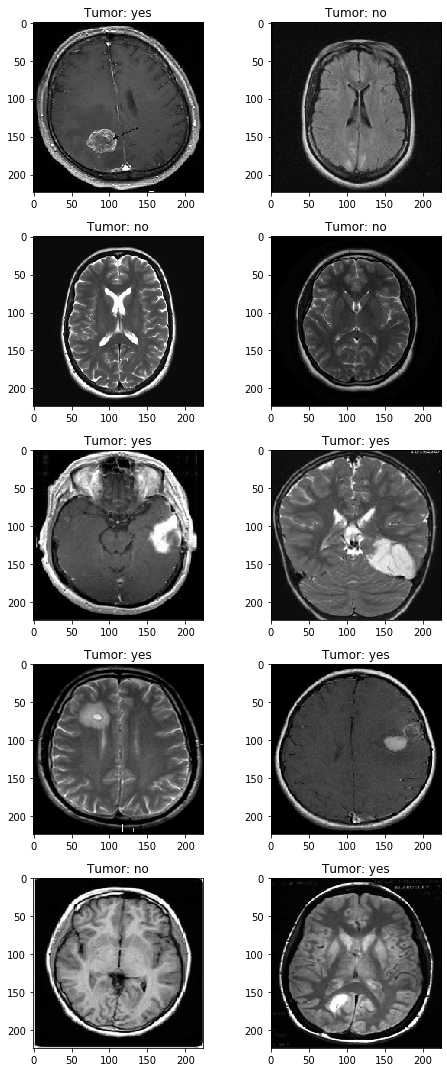

In [65]:
# Visualize images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(7,15)
for i in range(5):
    for j in range (2):
        l= np.random.randint(0,len(y_labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tumor: '+y_labels[l])
        
plt.tight_layout()

## Discuss why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.

In [66]:
## This model can act as a supplementary tool for doctors. 
## Sometimes it's hard for doctors to identify early-stage tumor.
## So this model can help them to do a prediction on whether those images really have tumors or not.
## If what they think are not consistent with the results of the model, it's necessary for them to do a double check.

## Run at least three prediction models to try to predict brain tumor MRI images well.

In [67]:
# Train test split resized images
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


y_train 

,no,yes
38,0,1
143,0,1
84,0,1
55,0,1
217,1,0
...,...,...
106,0,1
14,0,1
92,0,1
179,1,0


### Use transfer learning for at least one of these models

#### VGG16

In [33]:
# Quick explantory example before full code examples below
# Create the base model from the pre-trained model VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

base_model = VGG16(input_shape=(224, 224, 3),
                                               include_top=False, # Drops fully connected layers and output layer structure from pretrained model.
                                               weights='imagenet') # Using weight from model trained to 1000 categories of imagenet competition
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
# Next step: Freeze the weights of the VGG16 model so that they are not trained with you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

base_model.summary() # Note the trainable parameters at the bottom now equal zero.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
model = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2,activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:
# Fit VGG16 model with frozen imagent weights and new input/output layer shapes (outputs have trainable parameters)

model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model.fit(X_train, y_train, epochs = 25, verbose=1, validation_data=(X_test,y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/25
202/202 [==============================] - 40s 200ms/sample - loss: 0.6795 - acc: 0.6337 - val_loss: 0.6972 - val_acc: 0.5294
Epoch 2/25
202/202 [==============================] - 41s 201ms/sample - loss: 0.6640 - acc: 0.6337 - val_loss: 0.7020 - val_acc: 0.5294
Epoch 3/25
202/202 [==============================] - 40s 197ms/sample - loss: 0.6543 - acc: 0.6337 - val_loss: 0.7036 - val_acc: 0.5294
Epoch 4/25
202/202 [==============================] - 38s 187ms/sample - loss: 0.6499 - acc: 0.6337 - val_loss: 0.7042 - val_acc: 0.5294
Epoch 5/25
202/202 [==============================] - 38s 186ms/sample - loss: 0.6453 - acc: 0.6337 - val_loss: 0.7015 - val_acc: 0.5294
Epoch 6/25
202/202 [==============================] - 36s 179ms/sample - loss: 0.6418 - acc: 0.6337 - val_loss: 0.6943 - val_acc: 0.5294
Epoch 7/25
202/202 [==============================] - 36s 176ms/sample - loss: 0.6375 - acc: 0.6337 - val_loss: 0.6895 - val_acc: 0.5

#### Inception model

In [42]:
# example of loading the Inception model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

# Create the base model from the pre-trained model VGG16
base_model_2 = InceptionResNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

base_model_2.summary() # Notice unfrozen number of trainable parameters

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
activation_370 (Activation)     (None, 5, 5, 192)    0           batch_normalization_370[0][0]    
__________________________________________________________________________________________________
activation_373 (Activation)     (None, 5, 5, 256)    0           batch_normalization_373[0][0]    
__________________________________________________________________________________________________
block8_2_mixed (Concatenate)    (None, 5, 5, 448)    0           activation_370[0][0]             
                                                                 activation_373[0][0]             
__________________________________________________________________________________________________
block8_2_conv (Conv2D)          (None, 5, 5, 2080)   933920      block8_2_mixed[0][0]             
__________________________________________________________________________________________________
block8_2 (

In [43]:
# Add new GAP layer and output layer to frozen layers of original model with adjusted input
model_2 = Sequential([
  base_model_2,
   GlobalAveragePooling2D(),
   Dense(2,activation="sigmoid")
])

√.summary() #not showing up in model summary, but your trainable paramaters have just increased by a huge amount!

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1536)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 3074      
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


In [44]:
# Fit Inception model with some unfrozen imagenet weights and new input/output layer shapes (outputs have trainable parameters)

model_2.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model_2.fit(X_train, y_train,
          epochs = 25, verbose=1,validation_data=(X_test,y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/25
202/202 [==============================] - 96s 474ms/sample - loss: 0.4405 - acc: 0.8168 - val_loss: 4.7406 - val_acc: 0.7059
Epoch 2/25
202/202 [==============================] - 69s 343ms/sample - loss: 0.3180 - acc: 0.8515 - val_loss: 7.5753 - val_acc: 0.4706
Epoch 3/25
202/202 [==============================] - 68s 335ms/sample - loss: 0.2970 - acc: 0.9059 - val_loss: 8.5331 - val_acc: 0.4706
Epoch 4/25
202/202 [==============================] - 67s 333ms/sample - loss: 0.1411 - acc: 0.9356 - val_loss: 8.5331 - val_acc: 0.4706
Epoch 5/25
202/202 [==============================] - 67s 333ms/sample - loss: 0.0550 - acc: 0.9802 - val_loss: 0.6931 - val_acc: 0.4706
Epoch 6/25
202/202 [==============================] - 67s 332ms/sample - loss: 0.0473 - acc: 0.9802 - val_loss: 7.5143 - val_acc: 0.4706
Epoch 7/25
202/202 [==============================] - 69s 340ms/sample - loss: 0.0795 - acc: 0.9802 - val_loss: 0.6931 - val_acc: 0.4

### Other models

In [47]:
def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization()(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization()(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization()(y3)
    return tf.keras.layers.concatenate([y1, y3])

def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)

x = tf.keras.layers.Input(shape=[224, 224, 3])

y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same',  activation='relu')(x)
y = tf.keras.layers.BatchNormalization()(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(64, 128)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(72, 256)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(96, 512)(y)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(2,
                          activation='sigmoid')(y)

model_3 = tf.keras.Model(x, y)

model_3.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model_3.fit(X_train, y_train,
          epochs = 25, verbose=1,validation_data=(X_test,y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/25
202/202 [==============================] - 30s 150ms/sample - loss: 0.6461 - acc: 0.6139 - val_loss: 0.6967 - val_acc: 0.4706
Epoch 2/25
202/202 [==============================] - 31s 152ms/sample - loss: 0.5907 - acc: 0.6881 - val_loss: 0.6932 - val_acc: 0.4706
Epoch 3/25
202/202 [==============================] - 28s 140ms/sample - loss: 0.5191 - acc: 0.7178 - val_loss: 0.7224 - val_acc: 0.4706
Epoch 4/25
202/202 [==============================] - 28s 137ms/sample - loss: 0.4743 - acc: 0.7822 - val_loss: 0.8320 - val_acc: 0.4706
Epoch 5/25
202/202 [==============================] - 28s 138ms/sample - loss: 0.4293 - acc: 0.7574 - val_loss: 0.7615 - val_acc: 0.4706
Epoch 6/25
202/202 [==============================] - 27s 135ms/sample - loss: 0.3581 - acc: 0.8465 - val_loss: 0.7387 - val_acc: 0.4706
Epoch 7/25
202/202 [==============================] - 28s 136ms/sample - loss: 0.3421 - acc: 0.8366 - val_loss: 0.8239 - val_acc: 0.4

## Submit your best model to the leader board for the Brain Tumor Diagnostic AI Model Share competition.

In [48]:
# Load libraries for onnx model conversion (keras to onnx)
! pip3 install keras2onnx
! pip3 install onnxruntime

In [73]:
import os
os.environ['TF_KERAS'] = '1' # Add this environmental variable whenever you use tensorflow's tf.keras to build your keras model
import onnx

import keras2onnx

from keras2onnx import convert_keras
onx = convert_keras(model, 'my_model.onnx')
with open("my_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [74]:
# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x): # adjusted from keras github code
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

raw_predictions=model.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(pd.DataFrame(y_train)).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0]
['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [75]:
# Now we can extract some evaluative metrics to use for model submission

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata



In [76]:
# y_test is one hot encoded so we need to extract labels before runing model_eval_metrics()
y_test_labels=y_test.idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.823529,0.813187,0.875,0.8125,0,0,0,0


In [77]:
# add metrics to submittable object
modelevalobject=model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")


modelevalobject# add metrics to submittable object


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.823529,0.813187,0.875,0.8125,0,0,0,0


In [78]:
#install aimodelshare library (version 0.0.3 last updated 3/6/2020)
! pip3 install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.5.tar.gz?raw=true

  Created wheel for aimodelshare: filename=aimodelshare-0.0.5-py3-none-any.whl size=5303 sha256=7c1cd946617697d23e997a0386d31eab26e88006677fac04d2e836b85146532d
  Stored in directory: /Users/hengyuai/Library/Caches/pip/wheels/92/f8/26/59ad201dd65e4eeb596cfde28eb7d9340396f3687f129ecac0
Successfully built aimodelshare
  Attempting uninstall: aimodelshare
    Found existing installation: aimodelshare 0.0.2
    Uninstalling aimodelshare-0.0.2:
      Successfully uninstalled aimodelshare-0.0.2


In [84]:
# Example Model Pre-launched into Model Share Site
apiurl="https://a53yv0xqce.execute-api.us-east-1.amazonaws.com/prod/m"
username = ""
password = ""

model_filepath="my_model.onnx"   

# New! Assign model object to model argument parameter to submit model architecture to leaderboard.
model=model

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

import pickle
aws_key_password_region = pickle.load( open( "braintumor_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [85]:
# Submit your model using submit_model() function
# Works with models and preprocessors. 
import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,modelobject=model,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata="default",preprocessor_filepath="default",preprocessor="default")


"my_model.onnx" has been loaded to version 19 of your prediction API.
This version of the model will be used by your prediction api for all future predictions automatically.
If you wish to use an older version of the model, please reference the getting started guide at aimodelshare.com.


In [86]:
# arguments required to get leaderboard below
apiurl="https://a53yv0xqce.execute-api.us-east-1.amazonaws.com/prod/m"
username = ""
password = ""

## Import the best model from the leader board (whatever the best model is after your final submission)

In [90]:
import aimodelshare as ai

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression,model_config,model_optim_config,model_epochs
15,0.941176,0.940812,0.942547,0.939815,0,0,0,0,Taketo,17,1.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5
14,0.901961,0.901354,0.902950,0.900463,0,0,0,0,Taketo,16,2.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",10
16,0.875000,0.868718,0.868718,0.868718,0,0,0,0,3scman,18,3.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.01, 'decay...",25
17,0.823529,0.813187,0.875000,0.812500,0,0,0,0,AlisaAi,19,3.666667,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",25
13,0.803922,0.802019,0.805643,0.800926,0,0,0,0,Taketo,15,5.666667,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5
3,0.784314,0.775690,0.808824,0.775463,0,0,0,0,username1,5,6.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5
12,0.784314,0.778873,0.796053,0.777778,0,0,0,0,SUN-Wenjun,14,6.666667,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",20
8,0.784314,0.771673,0.827778,0.773148,0,0,0,0,username1,10,6.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5
6,0.784314,0.771673,0.827778,0.773148,0,0,0,0,username1,8,6.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5
7,0.784314,0.771673,0.827778,0.773148,0,0,0,0,username1,9,6.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5


In [102]:
# Import and print model details from leaderboard
model_config= leaderboard.loc[0,'model_config'] # model details best model (i.e.-row #1)
model_optim_config= leaderboard.loc[0,'model_optim_config'] # model details best model (i.e.-row #1)

print(model_config)
print(model_optim_config)

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape: !!python/tuple [null, 224, 224, 3]
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {dtype: float32}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config: {dtype: float32, seed: null}
      kernel_regularizer: null
      name: dense
      trainable: true
      units: 64
      use_bias: true
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {dtype: float32}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: GlorotUniform
        config: {dtype: float32, seed: null}

In [103]:
# Import model config to use to fit same architecture to new data
from tensorflow.keras.models import model_from_yaml
model = model_from_yaml(model_config)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224, 224, 64)      256       
_________________________________________________________________
dense_1 (Dense)              (None, 224, 224, 64)      4160      
_________________________________________________________________
dense_2 (Dense)              (None, 224, 224, 64)      4160      
_________________________________________________________________
flatten (Flatten)            (None, 3211264)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6422530   
Total params: 6,431,106
Trainable params: 6,431,106
Non-trainable params: 0
_________________________________________________________________


### Explain how the model's structure is different from your best model and how the model's optimization approach is different from your best model

In [99]:
### The model has less layers than my transfer learning model. But we use the same Adam optimizer.

## Fit the best model from the leader board to training data and evaluate it on test data to complete your report.

In [112]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model.fit(X_train, np.array(y_train), epochs = 5, verbose=1,validation_data=(X_test,np.array(y_test)))

Train on 202 samples, validate on 51 samples
Epoch 1/5
202/202 [==============================] - 12s 60ms/sample - loss: 1.7721 - acc: 0.7723 - val_loss: 1.0507 - val_acc: 0.8039
Epoch 2/5
202/202 [==============================] - 11s 56ms/sample - loss: 0.4379 - acc: 0.8416 - val_loss: 0.9014 - val_acc: 0.8039
Epoch 3/5
202/202 [==============================] - 11s 54ms/sample - loss: 0.0589 - acc: 0.9851 - val_loss: 0.6962 - val_acc: 0.8235
Epoch 4/5
202/202 [==============================] - 11s 53ms/sample - loss: 0.0181 - acc: 1.0000 - val_loss: 0.7517 - val_acc: 0.8235
Epoch 5/5
202/202 [==============================] - 11s 54ms/sample - loss: 0.0190 - acc: 1.0000 - val_loss: 0.7589 - val_acc: 0.8235


In [109]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model.fit(X_train, y_train, epochs = 25, verbose=1,validation_data=(X_test,y_test))

Train on 202 samples, validate on 51 samples
Epoch 1/25
202/202 [==============================] - 13s 66ms/sample - loss: 13.6531 - acc: 0.5050 - val_loss: 0.6508 - val_acc: 0.7059
Epoch 2/25
202/202 [==============================] - 11s 54ms/sample - loss: 3.4449 - acc: 0.6485 - val_loss: 0.4674 - val_acc: 0.7647
Epoch 3/25
202/202 [==============================] - 11s 53ms/sample - loss: 0.8309 - acc: 0.6485 - val_loss: 0.7761 - val_acc: 0.5490
Epoch 4/25
202/202 [==============================] - 11s 53ms/sample - loss: 0.5596 - acc: 0.7178 - val_loss: 0.5159 - val_acc: 0.6863
Epoch 5/25
202/202 [==============================] - 11s 53ms/sample - loss: 0.4642 - acc: 0.7624 - val_loss: 0.3948 - val_acc: 0.8235
Epoch 6/25
202/202 [==============================] - 11s 54ms/sample - loss: 0.4101 - acc: 0.8020 - val_loss: 0.3751 - val_acc: 0.8039
Epoch 7/25
202/202 [==============================] - 11s 54ms/sample - loss: 0.3354 - acc: 0.8515 - val_loss: 0.3518 - val_acc: 0.8627
Ep